In [1]:
!pip install pydotplus 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus

In [3]:
fraud = pd.read_csv('Fraud_check.csv')

In [4]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## EDA 

In [5]:
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Risky"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Good"


In [6]:
fraud['income'].value_counts()

Risky    476
Good     124
Name: income, dtype: int64

In [7]:
fraud.drop(["Taxable.Income"],axis=1,inplace=True)
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [8]:
fraud

,undergrad,marital,population,experience,urban,income
0,NO,Single,50047,10,YES,Risky
1,YES,Divorced,134075,18,YES,Risky
2,NO,Married,160205,30,YES,Risky
3,YES,Single,193264,15,YES,Risky
4,NO,Married,27533,28,NO,Risky
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Risky
596,YES,Divorced,55369,2,YES,Risky
597,NO,Divorced,154058,0,YES,Risky
598,YES,Married,180083,17,NO,Risky


In [9]:
fraud.dtypes

undergrad     object
marital       object
population     int64
experience     int64
urban         object
income        object
dtype: object

In [10]:
fraud['undergrad'].value_counts()

YES    312
NO     288
Name: undergrad, dtype: int64

In [11]:
fraud['marital'].value_counts()

Single      217
Married     194
Divorced    189
Name: marital, dtype: int64

In [12]:
fraud['urban'].value_counts()

YES    302
NO     298
Name: urban, dtype: int64

## Getting Dummies

In [13]:
fraud=pd.get_dummies(fraud,columns=['undergrad','marital','urban'], drop_first=True)

In [14]:
fraud.dtypes

population          int64
experience          int64
income             object
undergrad_YES       uint8
marital_Married     uint8
marital_Single      uint8
urban_YES           uint8
dtype: object

In [15]:
fraud

,population,experience,income,undergrad_YES,marital_Married,marital_Single,urban_YES
0,50047,10,Risky,0,0,1,1
1,134075,18,Risky,1,0,0,1
2,160205,30,Risky,0,1,0,1
3,193264,15,Risky,1,0,1,1
4,27533,28,Risky,0,1,0,0
...,...,...,...,...,...,...,...
595,39492,7,Risky,1,0,0,1
596,55369,2,Risky,1,0,0,1
597,154058,0,Risky,0,0,0,1
598,180083,17,Risky,1,1,0,0


In [16]:
x_1=fraud.drop('income',axis=1)
y_1=fraud['income']

In [17]:
x_1

,population,experience,undergrad_YES,marital_Married,marital_Single,urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [18]:
y_1

0      Risky
1      Risky
2      Risky
3      Risky
4      Risky
       ...  
595    Risky
596    Risky
597    Risky
598    Risky
599    Risky
Name: income, Length: 600, dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y= le.fit_transform(y_1)

## Normalising Data

In [20]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [21]:
x= norm_func(x_1)

In [22]:
x

,population,experience,undergrad_YES,marital_Married,marital_Single,urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y) #spliting data in test and train

## Model

In [24]:
model = RF()
model.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
#model.estimators_

In [26]:
model.classes_

array([0, 1])

In [27]:
model.n_classes_

2

In [28]:
model.n_outputs_

1

In [29]:
#model.oob_score_

# Prediction

In [30]:
##Prediction on test data
prediction = model.predict(x_test)

In [31]:
##Accuracy
acc_test =accuracy_score(y_test,prediction)
print(acc_test)


0.75


### Creating pdf and png file the selected decision tree

In [32]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score,auc
from sklearn import metrics
import matplotlib.pyplot as plt

In [33]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.78      0.95      0.86        95

    accuracy                           0.75       120
   macro avg       0.39      0.47      0.43       120
weighted avg       0.62      0.75      0.68       120



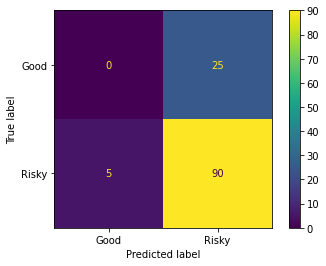

In [34]:
confu = metrics.confusion_matrix(y_test, prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confu, display_labels = ['Good','Risky'])

cm_display.plot()
plt.show()

Text(0, 0.5, 'True Positive Rate')

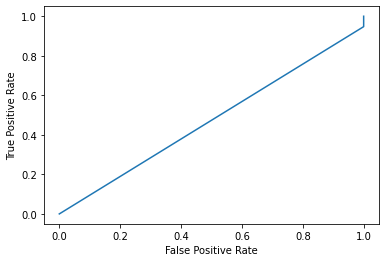

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [36]:
roc_auc_score(y_test,prediction)

0.47368421052631576

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, prediction))
rms

0.5

In [38]:
spec= 87/(87+24)
spec

0.7837837837837838

In [40]:
feature_names= x.columns
target_names=np.array(["Good","Risky"])

In [41]:
## In random forest we can plot a Decision tree present in Random forest


tree = model.estimators_[5]

dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = x.columns ,class_names =target_names,impurity =False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [42]:

graph.write_pdf('fraudrf.pdf')
graph.write_png('fraudrf.png')

True

## On evaluating the above model we find that 
1. The F1 scores are the following: 

* '0'-0.06
* '1'-0.84


2. The Accuracy is 73%

3. The RMSE value is  0.52
4. For the above model we need high specifity because, we do not want the risky criterion to be detected as good. Specificity is 0.78
## All the above parameters sugest that this is a good model